In [1]:
import numpy as np
import math
from PIL import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
darkImg= cv2 .imread('Dark.jpg')
dark = cv2.cvtColor(darkImg, cv2.COLOR_BGR2RGB)

In [11]:
pinkImg= cv2.imread('Pink.jpg')
pink = cv2.cvtColor(pinkImg, cv2.COLOR_BGR2RGB)

In [12]:
def getNormalizedCDF(hist):
    cdf=np.cumsum(hist).astype('float64')
    normalized = (cdf/cdf.max()).astype('float64')
    out = map(lambda n: "%.2f" % n, normalized)
    return out

In [13]:
def getHistogram(img,i):
    h , b =np.histogram(img[:, :,i], bins=256, range=(0, 256) )
    return h

In [30]:
def plotHistogram(img,flag,j1,j2):
    colors=("r","g","b")
    i=(0,1,2)
    plt.xlim([0,256])
    
    for x , y in zip(i , colors):
        h , b =np.histogram(img[:, :, x], bins=256, range=(0, 256) )
        if flag:
            axs[j1][j2].plot(b[0:-1],h,color=y)
        else:
            plt.plot(b[0:-1],h,color=y)

    plt.xlabel("value") 
    plt.ylabel("number")
    plt.savefig('res05.jpg')

In [31]:
def inverseCDF(cdf,val):
    cdf = np.array(cdf, dtype=float)
    r=np.where(cdf==val) 
    r = np.array(r, dtype=int)

    if val>0.96 :
        return 240
    elif not r.any():
        return inverseCDF(cdf,val+0.02)
    else:
        return r[0][0]
    


In [32]:
def maping(cdf,c):
    src=getNormalizedCDF(getHistogram(dark,c)) 
    A = []
    for x in src:
        A.append(inverseCDF(cdf,float(x)) )
        
    return A

In [33]:
cdf_red=getNormalizedCDF(getHistogram(pink,0))
cdf_green=getNormalizedCDF(getHistogram(pink,1))
cdf_blue=getNormalizedCDF(getHistogram(pink,2))
R_map=maping(cdf_red,0)
G_map=maping(cdf_green,1)
B_map=maping(cdf_blue,2)


In [34]:
def map_red(a):
    global R_map
    return R_map[a]
R_vFunc=np.vectorize(map_red)

In [35]:
def map_blue(a):
    global B_map
    return B_map[a]
B_vFunc=np.vectorize(map_blue)

In [36]:
def map_green(a):
    global G_map
    return G_map[a]
G_vFunc=np.vectorize(map_green)

In [37]:
R=R_vFunc(dark[:,:,0])
G=G_vFunc(dark[:,:,1])
B=B_vFunc(dark[:,:,2])

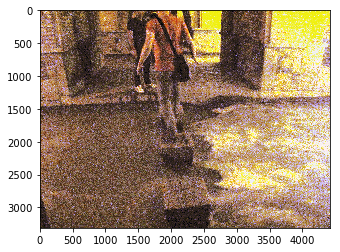

In [38]:
result=cv2.merge([R,G,B])
plt.imshow(result)

In [39]:
def plotCDF(img,flag,j1,j2):
    i=(0,1,2)
    c=("r","g","b")
    
    for x,y in zip(i,c):
        h , b =np.histogram(img[:, :, x], bins=256, range=(0, 256) )
        if flag:
            axs[j1][j2].plot(np.cumsum(h),color=y)
        else:
            plt.plot(np.cumsum(h),color=y)
        
    plt.show


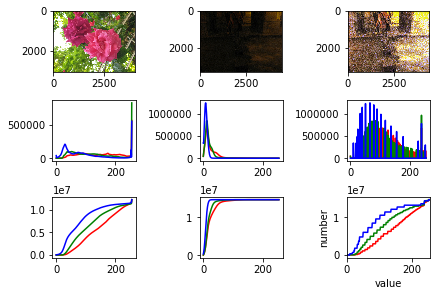

In [40]:
fig,axs = plt.subplots(3,3,constrained_layout=True)
axs[0][0].imshow(pink)
axs[0][1].imshow(dark)
axs[0][2].imshow(result)
plotHistogram(pink,True,1,0)
plotHistogram(dark,True,1,1)
plotHistogram(result,True,1,2)
plotCDF(pink,True,2,0)
plotCDF(dark,True,2,1)
plotCDF(result,True,2,2)

In [41]:
inverseCDF(cdf_red,0.29)

97

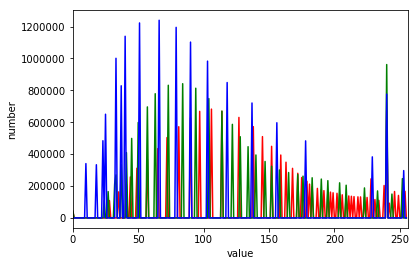

In [42]:
plotHistogram(result,False,1,2)

In [29]:
plt.savefig('res05.jpg')

<Figure size 432x288 with 0 Axes>

In [43]:
import scipy.misc
scipy.misc.imsave('res06.jpg',result)

/Users/helia_yaz/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  
